<a href="https://colab.research.google.com/github/gbam-ds/FP-ML/blob/main/Porto_Seguro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Porto Seguro
##Getting data

see <a href="{https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/discussion/40222}">this discusion</a> about the data: 

#Importando dados

In [94]:
# Core
import seaborn as sns
#import pandas as pd
import numpy as np

# Visual
import matplotlib.pyplot as plt
import graphviz
import pprint
import pandas as pd

# Sklearn
from sklearn import tree as sk_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import median_absolute_error, mean_absolute_error, r2_score, max_error, explained_variance_score
from sklearn.model_selection import train_test_split

In [95]:
#import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [96]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [97]:
pd.set_option('display.max_columns', None)

#train dataset
train_path = '/content/drive/MyDrive/porto-seguro-safe-driver-prediction/train.csv'
train_df = pd.read_csv(train_path)
df = train_df.copy()
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


##Distribuição de target

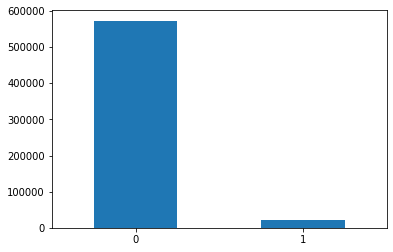

In [98]:
#distribuição de target
df["target"].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 360);

##Gerando train e test

In [99]:
df.columns[2]

'ps_ind_01'

In [100]:
#dividindo train.csv em train e test
#nesse código dropamos id

labels = df.columns[2:]

X = df[labels]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

In [101]:
#definindo train e test

train = pd.concat((y_train, X_train), axis = 1)
test = pd.concat((y_test, X_test), axis = 1) #so vamos usar no final

In [102]:
df.shape

(595212, 59)

In [103]:
train.shape

(505930, 58)

In [104]:
test.shape

(89282, 58)

##Gerando treino e validação

Perfeito. Agora temos que dividir a base train em treino e validação

In [105]:
train.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
311607,0,6,1,5,0,0,0,0,0,1,0,0,0,0,0,8,1,0,0,0.7,0.3,0.653835,11,1,1,0,0,0,1,1,2,1,95,2,0.400000,0.762201,0.334813,3.000000,0.9,0.9,0.6,4,2,8,4,9,2,11,6,2,2,5,0,0,1,0,0,0
366647,0,0,4,9,1,0,0,0,1,0,0,0,0,0,0,8,1,0,0,0.3,0.0,0.792543,7,1,0,0,1,11,1,1,2,1,44,3,0.447214,0.774717,0.339116,3.162278,0.7,0.4,0.1,1,3,4,2,11,1,5,7,3,0,5,0,1,1,0,0,0
471590,0,0,2,2,0,0,1,0,0,0,0,0,0,0,0,11,1,0,0,0.4,0.0,0.923648,11,0,-1,0,-1,10,1,1,2,1,83,2,0.424264,0.949413,0.418569,3.000000,0.5,0.3,0.5,2,2,8,2,10,3,8,3,3,5,5,0,1,1,0,1,0
538416,0,1,1,10,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.9,1.8,1.825685,11,1,1,6,1,14,1,1,2,1,104,0,0.479583,0.832017,0.386005,3.000000,0.5,0.5,0.9,2,0,9,3,10,2,8,2,1,3,7,0,1,1,1,0,1
459085,1,3,1,5,1,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0.9,0.6,1.033501,11,1,-1,0,-1,7,1,1,2,1,96,3,0.446878,0.724640,0.430116,2.645751,0.3,0.0,0.8,3,4,7,5,9,3,8,3,1,1,13,0,0,1,0,0,0


In [106]:
train.columns[0]

'target'

In [107]:
#dividindo train
labels = train.columns[1:]

X = train[labels]
y = train['target']

X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size=0.17, random_state=1)

In [108]:
treino = pd.concat((y_treino, X_treino), axis = 1)
valid = pd.concat((y_valid, X_valid), axis = 1)

In [109]:
treino.shape

(419921, 58)

In [110]:
valid.shape

(86009, 58)

Perfeito. Agora temos que resamplar treino

##Resampling through SMOTE

In [111]:
from collections import Counter
from imblearn.over_sampling import SMOTE

labels = treino.columns[1:]

X = treino[labels]
y = treino['target']

X_resampled, y_resampled = SMOTE(random_state=7).fit_resample(X,y)
Counter(y_resampled)

Counter({0: 404674, 1: 404674})

In [112]:
X_resampled.reset_index(drop=True, inplace=True)
y_resampled.reset_index(drop=True, inplace=True)

Treino resemplada:

In [113]:
treino = pd.concat((y_resampled, X_resampled), axis = 1)

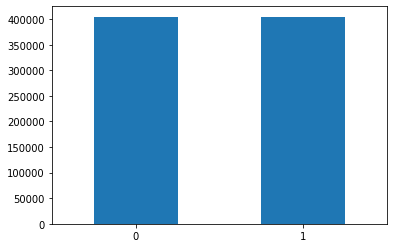

In [114]:
#distribuição de target
treino["target"].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 360);

##Overview

Agora temos:

*   (1) treino
*   (2) validação (valid)
*   (3) test

Fizemos resample somente para a (1) treino. 

É hora de fazer feature engineering em todas.

#Feature Engineering

##O que precisamos fazer?

In [115]:
treino=treino.replace(-1, np.nan)
valid=valid.replace(-1, np.nan)
test=test.replace(-1, np.nan)

treino.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,1,1.0,6,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.6,0.3,0.646142,6.0,1.0,NaN,0,1.0,11,1.0,1,0.0,1,57,2.0,0.394715,0.586522,0.378550,1.732051,0.3,0.7,0.7,3,3,7,2,10,3,7,4,4,1,6,0,0,1,1,0,0
1,0,0,2.0,3,0.0,0.0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.5,0.2,0.606218,11.0,1.0,NaN,0,NaN,11,1.0,1,2.0,1,19,3.0,0.316228,0.627783,0.388716,2.828427,0.3,0.7,0.3,3,2,8,2,10,2,10,6,2,3,3,0,0,1,0,0,0
2,0,2,1.0,2,1.0,0.0,0,0,0,1,0,0,0,0,0,3,0,0,1,0.9,0.5,0.722409,10.0,1.0,NaN,0,0.0,11,1.0,1,0.0,1,67,2.0,0.374166,0.738101,0.366606,3.464102,0.4,0.3,0.6,2,2,9,3,9,2,6,4,1,0,6,0,0,1,0,0,0
3,0,5,1.0,6,1.0,0.0,0,1,0,0,0,0,0,0,0,8,1,0,0,0.8,1.3,1.283063,10.0,1.0,NaN,0,1.0,0,1.0,0,0.0,1,88,3.0,0.400000,1.019473,0.397492,3.605551,0.3,0.4,0.3,0,3,6,3,8,4,10,5,0,1,5,0,1,1,0,0,0
4,0,0,1.0,5,1.0,6.0,1,0,0,0,0,0,0,0,0,3,0,0,1,0.9,0.4,0.743303,11.0,1.0,NaN,0,NaN,14,1.0,1,2.0,1,68,3.0,0.400000,0.760559,0.407431,2.645751,0.5,0.9,0.6,3,3,7,3,8,2,4,4,4,3,6,0,1,1,0,1,0


In [116]:
total = treino.isnull().sum().sort_values(ascending=False)

percent = (treino.isnull().sum()/treino.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat(
     [total, percent],
      axis=1,
      keys=['Total', 'Percent'])
      
missing_data.head(18)

,Total,Percent
ps_car_03_cat,472552,0.583868
ps_car_05_cat,283576,0.350376
ps_reg_03,90270,0.111534
ps_car_14,39977,0.049394
ps_car_07_cat,12463,0.015399
ps_ind_05_cat,5744,0.007097
ps_car_09_cat,498,0.000615
ps_ind_02_cat,488,0.000603
ps_car_01_cat,409,0.000505
ps_ind_04_cat,393,0.000486


In [117]:
treino['ps_car_03_cat'].fillna(treino['ps_car_03_cat'].mode()[0], inplace=True)
treino['ps_car_05_cat'].fillna(treino['ps_car_05_cat'].mode()[0], inplace=True)
treino['ps_car_07_cat'].fillna(treino['ps_car_07_cat'].mode()[0], inplace=True)
treino['ps_car_09_cat'].fillna(treino['ps_car_09_cat'].mode()[0], inplace=True)
treino['ps_car_01_cat'].fillna(treino['ps_car_01_cat'].mode()[0], inplace=True)
treino['ps_car_02_cat'].fillna(treino['ps_car_02_cat'].mode()[0], inplace=True)
treino['ps_ind_05_cat'].fillna(treino['ps_ind_05_cat'].mode()[0], inplace=True)
treino['ps_ind_02_cat'].fillna(treino['ps_ind_02_cat'].mode()[0], inplace=True)
treino['ps_ind_04_cat'].fillna(treino['ps_ind_04_cat'].mode()[0], inplace=True)
treino['ps_reg_03'].fillna(treino['ps_reg_03'].mode()[0], inplace=True)

treino['ps_car_14'].fillna(treino['ps_car_14'].mean(), inplace=True)
treino['ps_car_11'].fillna(treino['ps_car_11'].mean(), inplace=True)
treino['ps_car_12'].fillna(treino['ps_car_12'].mean(), inplace=True)

In [118]:
total = treino.isnull().sum().sort_values(ascending=False)

percent = (treino.isnull().sum()/treino.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat(
     [total, percent],
      axis=1,
      keys=['Total', 'Percent'])
      
missing_data.head()

,Total,Percent
target,0,0.0
ps_calc_06,0,0.0
ps_car_10_cat,0,0.0
ps_car_11_cat,0,0.0
ps_car_11,0,0.0


In [119]:
total = valid.isnull().sum().sort_values(ascending=False)

percent = (valid.isnull().sum()/valid.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat(
     [total, percent],
      axis=1,
      keys=['Total', 'Percent'])
      
missing_data.head(18)


,Total,Percent
ps_car_03_cat,59398,0.690602
ps_car_05_cat,38439,0.446918
ps_reg_03,15636,0.181795
ps_car_14,6140,0.071388
ps_car_07_cat,1643,0.019103
ps_ind_05_cat,861,0.010011
ps_car_09_cat,85,0.000988
ps_ind_02_cat,27,0.000314
ps_car_01_cat,17,0.000198
ps_ind_04_cat,11,0.000128


In [120]:
valid['ps_car_03_cat'].fillna(valid['ps_car_03_cat'].mode()[0], inplace=True)
valid['ps_car_05_cat'].fillna(valid['ps_car_05_cat'].mode()[0], inplace=True)
valid['ps_car_07_cat'].fillna(valid['ps_car_07_cat'].mode()[0], inplace=True)
valid['ps_ind_05_cat'].fillna(valid['ps_ind_05_cat'].mode()[0], inplace=True)
valid['ps_car_09_cat'].fillna(valid['ps_car_09_cat'].mode()[0], inplace=True)
valid['ps_ind_02_cat'].fillna(valid['ps_ind_02_cat'].mode()[0], inplace=True)
valid['ps_car_01_cat'].fillna(valid['ps_car_01_cat'].mode()[0], inplace=True)
valid['ps_ind_04_cat'].fillna(valid['ps_ind_04_cat'].mode()[0], inplace=True)
valid['ps_car_02_cat'].fillna(valid['ps_car_02_cat'].mode()[0], inplace=True)
 
valid['ps_reg_03'].fillna((valid['ps_reg_03'].mean()), inplace=True)
valid['ps_car_14'].fillna((valid['ps_car_14'].mean()), inplace=True)
valid['ps_car_11'].fillna((valid['ps_car_11'].mean()), inplace=True)

In [121]:
total = valid.isnull().sum().sort_values(ascending=False)

percent = (valid.isnull().sum()/valid.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat(
     [total, percent],
      axis=1,
      keys=['Total', 'Percent'])
      
missing_data.head()

,Total,Percent
target,0,0.0
ps_calc_06,0,0.0
ps_car_10_cat,0,0.0
ps_car_11_cat,0,0.0
ps_car_11,0,0.0


In [122]:
total = test.isnull().sum().sort_values(ascending=False)

percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat(
     [total, percent],
      axis=1,
      keys=['Total', 'Percent'])
      
missing_data.head(18)


,Total,Percent
ps_car_03_cat,61739,0.691506
ps_car_05_cat,40008,0.448108
ps_reg_03,16186,0.181291
ps_car_14,6421,0.071918
ps_car_07_cat,1711,0.019164
ps_ind_05_cat,832,0.009319
ps_car_09_cat,90,0.001008
ps_ind_02_cat,33,0.000370
ps_car_01_cat,13,0.000146
ps_ind_04_cat,11,0.000123


In [123]:
test['ps_car_03_cat'].fillna(test['ps_car_03_cat'].mode()[0], inplace=True)
test['ps_car_05_cat'].fillna(test['ps_car_05_cat'].mode()[0], inplace=True)
test['ps_car_07_cat'].fillna(test['ps_car_07_cat'].mode()[0], inplace=True)
test['ps_ind_05_cat'].fillna(test['ps_ind_05_cat'].mode()[0], inplace=True)
test['ps_car_09_cat'].fillna(test['ps_car_09_cat'].mode()[0], inplace=True)
test['ps_ind_02_cat'].fillna(test['ps_ind_02_cat'].mode()[0], inplace=True)
test['ps_car_01_cat'].fillna(test['ps_car_01_cat'].mode()[0], inplace=True)
test['ps_ind_04_cat'].fillna(test['ps_ind_04_cat'].mode()[0], inplace=True)
test['ps_car_02_cat'].fillna(test['ps_car_02_cat'].mode()[0], inplace=True)
 
test['ps_reg_03'].fillna((test['ps_reg_03'].mean()), inplace=True)
test['ps_car_14'].fillna((test['ps_car_14'].mean()), inplace=True)

In [124]:
total = test.isnull().sum().sort_values(ascending=False)

percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat(
     [total, percent],
      axis=1,
      keys=['Total', 'Percent'])
      
missing_data.head()

,Total,Percent
target,0,0.0
ps_calc_06,0,0.0
ps_car_10_cat,0,0.0
ps_car_11_cat,0,0.0
ps_car_11,0,0.0


##Outlier

In [125]:
#tirando outliers
#treino
n=3

for label, content in treino.items():
   upper_limit = treino[label].mean() + n*treino[label].std () 
   lower_limit = treino[label].mean() - n*treino[label].std ()

treino = treino[(treino[label] < upper_limit) & 
                   (treino[label] > lower_limit)]

#valid
n=3

for label, content in valid.items():
   upper_limit = valid[label].mean() + n*valid[label].std () 
   lower_limit = valid[label].mean() - n*valid[label].std ()

valid = valid[(valid[label] < upper_limit) & 
                   (valid[label] > lower_limit)]

#test
n=3

for label, content in test.items():
   upper_limit = test[label].mean() + n*test[label].std () 
   lower_limit = test[label].mean() - n*test[label].std ()

test = test[(test[label] < upper_limit) & 
                   (test[label] > lower_limit)]


#Modeling

##Decision Tree

###Aplicando DT em treino

In [126]:
#separando
labels = treino.columns[1:]

X = treino[labels]
y = treino['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#modeling
dt = sk_tree.DecisionTreeClassifier(max_depth = 2)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)


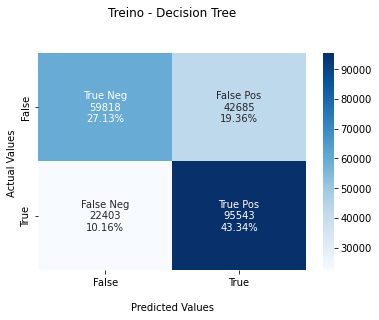

In [127]:
#Acurácia
from sklearn.metrics import confusion_matrix

#Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Treino - Decision Tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.

plt.show()

Notamos que a porcentagem de False Negative aumenta quando adicionamos níveis de nós de decisão (max_depth).

In [128]:
#Utilizando optuna para otimizar os hiperparâmetros do modelo

!pip install optuna

import optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [129]:
from sklearn.metrics import accuracy_score
def objective(trial):

    max_depth = trial.suggest_int("max_depth", 2, 100)

    min_samples_split = trial.suggest_int("min_samples_split", 2, 612)

    max_leaf_nodes = int(trial.suggest_int("max_leaf_nodes", 2, 612))

    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])

    dt_optuna = sk_tree.DecisionTreeClassifier(min_samples_split = min_samples_split, 

                                max_leaf_nodes = max_leaf_nodes,

                                criterion = criterion)

    dt_optuna.fit(X_train, y_train)

    return 1.0 - accuracy_score(y_test, dt_optuna.predict(X_test))



In [130]:
 study = optuna.create_study()
 study.optimize(objective, n_trials = 50)

[I 2022-05-31 15:35:40,238] A new study created in memory with name: no-name-7d2c3748-e412-4552-bae4-7cc249d3d524
[I 2022-05-31 15:35:56,580] Trial 0 finished with value: 0.08994370580043454 and parameters: {'max_depth': 14, 'min_samples_split': 520, 'max_leaf_nodes': 108, 'criterion': 'gini'}. Best is trial 0 with value: 0.08994370580043454.
[I 2022-05-31 15:36:22,708] Trial 1 finished with value: 0.06690436336749095 and parameters: {'max_depth': 53, 'min_samples_split': 416, 'max_leaf_nodes': 611, 'criterion': 'gini'}. Best is trial 1 with value: 0.06690436336749095.
[I 2022-05-31 15:36:41,097] Trial 2 finished with value: 0.07483817118698655 and parameters: {'max_depth': 46, 'min_samples_split': 344, 'max_leaf_nodes': 265, 'criterion': 'gini'}. Best is trial 1 with value: 0.06690436336749095.
[I 2022-05-31 15:37:05,585] Trial 3 finished with value: 0.0612159728553997 and parameters: {'max_depth': 23, 'min_samples_split': 275, 'max_leaf_nodes': 579, 'criterion': 'entropy'}. Best is t

In [131]:
print(study.best_params)

{'max_depth': 54, 'min_samples_split': 82, 'max_leaf_nodes': 608, 'criterion': 'entropy'}


In [132]:
dt_optimized = sk_tree.DecisionTreeClassifier(max_depth = 76, min_samples_split = 88, max_leaf_nodes= 612, criterion= 'entropy')
dt_optimized.fit(X_train, y_train)
y_pred = dt_optimized.predict(X_test)

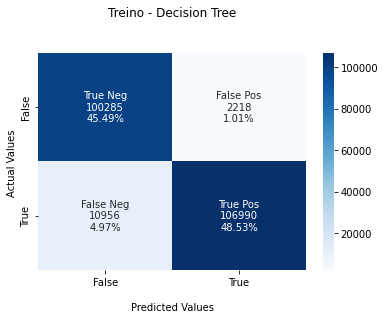

In [133]:
#Acurácia
from sklearn.metrics import confusion_matrix

#Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Treino - Decision Tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.

plt.show()

###Aplicando DT em valid

Lembrando que valid não foi resemplada, vamos testar os parâmetros do modelo em valid:

In [134]:
#separando
labels = valid.columns[1:]

X = valid[labels]
y = valid['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#modeling
dt = sk_tree.DecisionTreeClassifier(max_depth = 2)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)



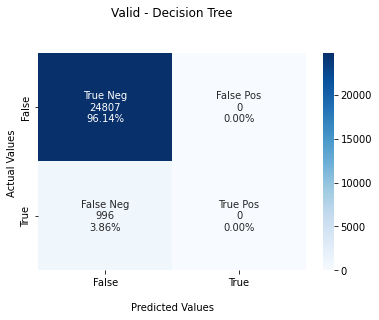

In [135]:
#Acurácia
from sklearn.metrics import confusion_matrix

#Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Valid - Decision Tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.

plt.show()

Vemos que a decision tree não é suficiente para nos prever casos de sinistro em uma base de dados desbalanceada.

In [136]:
#Aplicando dt_optimized em valid

labels = valid.columns[1:]

X = valid[labels]
y = valid['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

dt_optimized.fit(X_train, y_train)
y_pred = dt_optimized.predict(X_test)

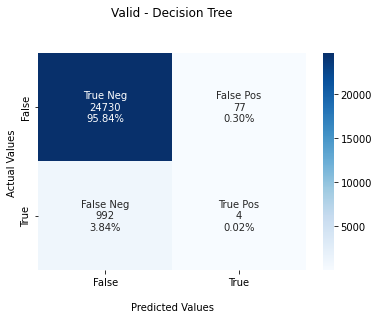

In [137]:
#Acurácia
from sklearn.metrics import confusion_matrix

#Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Valid - Decision Tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.

plt.show()

##Logistic Regression

### Aplicando LR em treino

In [138]:
#separando
labels = treino.columns[1:]

X = treino[labels]
y = treino['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#modeling
from sklearn.linear_model import LogisticRegression
logir = LogisticRegression()
logir.fit(X_train, y_train)
y_pred = logir.predict(X_test)


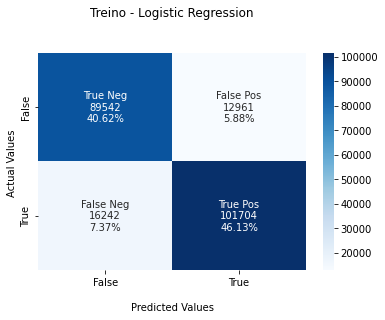

In [139]:
#Acurácia
from sklearn.metrics import confusion_matrix

#Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Treino - Logistic Regression\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.

plt.show()

Logistic Regression não performou tão bem, em termos de FN. Vamos testar em valid com propósito educacional apenas.

###Aplicando LR em valid

In [140]:
#separando
labels = valid.columns[1:]

X = valid[labels]
y = valid['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#modeling
from sklearn.linear_model import LogisticRegression
logir = LogisticRegression()
logir.fit(X_train, y_train)
y_pred = logir.predict(X_test)


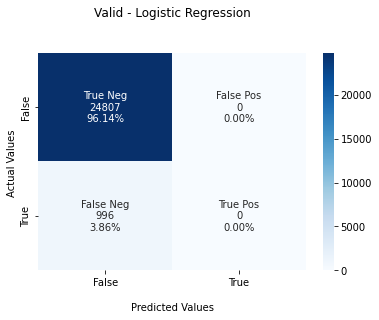

In [141]:
#Acurácia
from sklearn.metrics import confusion_matrix

#Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Valid - Logistic Regression\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.

plt.show()

Performa de maneira ruim.

##Random Forest

###Aplicando RF em treino

In [142]:
#separando
labels = treino.columns[1:]

X = treino[labels]
y = treino['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#modeling
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 100, max_depth = 9)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

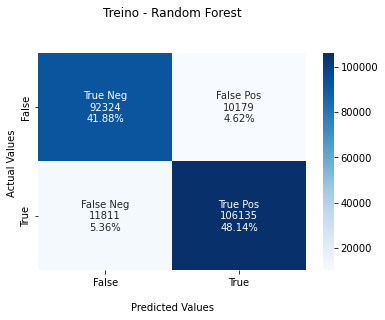

In [143]:
#Acurácia
from sklearn.metrics import confusion_matrix

#Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Treino - Random Forest\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.

plt.show()

max_depth = 9 manteve a menor taxa de erro, sendo FN < FP

###Aplicando RF em valid

In [144]:
#separando
labels = valid.columns[1:]

X = valid[labels]
y = valid['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#modeling
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 100, max_depth = 9)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

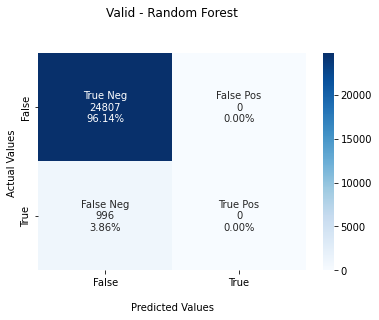

In [145]:
#Acurácia
from sklearn.metrics import confusion_matrix

#Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Valid - Random Forest\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.

plt.show()

##AdaBoosting

###Aplicanda Ada em treino

In [146]:
#separando
labels = treino.columns[1:]

X = treino[labels]
y = treino['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#modeling
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state= 7)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

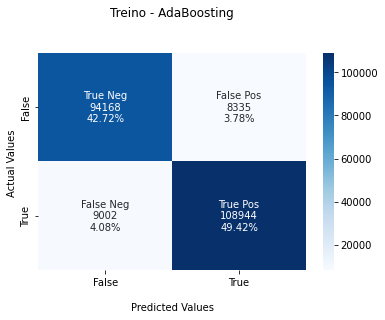

In [147]:
#Acurácia
from sklearn.metrics import confusion_matrix

#Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Treino - AdaBoosting\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.

plt.show()

###Aplicando Ada em valid

In [148]:
#separando
labels = valid.columns[1:]

X = valid[labels]
y = valid['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#modeling
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state= 7)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

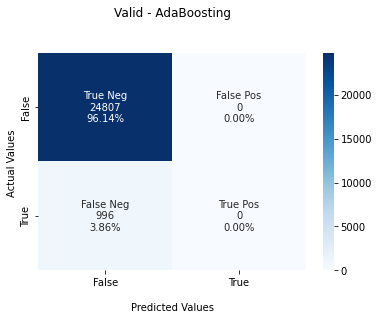

In [149]:
#Acurácia
from sklearn.metrics import confusion_matrix

#Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Valid - AdaBoosting\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.

plt.show()

Não apresenta qualquer sinal de melhora.

##GradientBoosting

###Aplicando GB em treino

In [150]:
#separando
labels = treino.columns[1:]

X = treino[labels]
y = treino['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#modeling
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0,
                                 max_depth=3, random_state=0)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

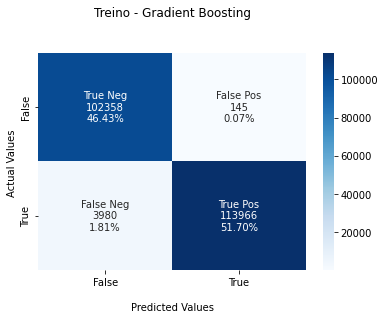

In [151]:
#Acurácia
from sklearn.metrics import confusion_matrix

#Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Treino - Gradient Boosting\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.

plt.show()

###Aplicando GB em valid

In [152]:
#separando
labels = valid.columns[1:]

X = valid[labels]
y = valid['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#modeling
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=3, random_state=0)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

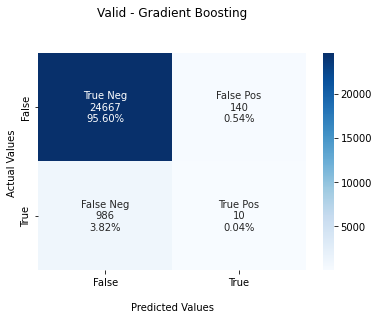

In [153]:
#Acurácia
from sklearn.metrics import confusion_matrix

#Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Valid - Gradient Boosting\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.

plt.show()

##XGBoost

###Aplicando XGBoost em treino

In [154]:
#separando
labels = treino.columns[1:]

X = treino[labels]
y = treino['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#modeling
import xgboost as xgb
xgb = xgb.XGBRegressor(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [155]:
#Acurácia
from sklearn.metrics import confusion_matrix

#Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Valid - Gradient Boosting\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.

plt.show()

ValueError: ignored